In [3]:
import torch
import torchvision.transforms as T
from PIL import Image
import matplotlib.pyplot as plt
import io, random
from torchvision.datasets.utils import download_url
import os

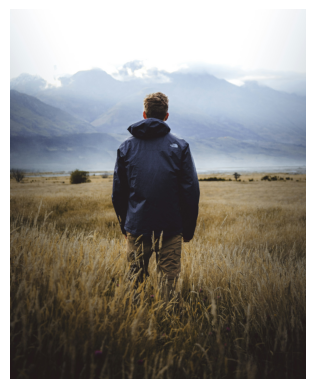

In [5]:
url = "https://images.unsplash.com/photo-1503023345310-bd7c1de61c7d"
fname = "sample.jpg"
root = "."

download_url(url, root, filename=fname, md5=None)
img = Image.open(os.path.join(root, fname)).convert("RGB")

plt.imshow(img); plt.axis("off");
plt.show()

In [6]:
img_size = 256

augment = T.Compose([
    T.RandomResizedCrop(size=img_size, scale=(0.8, 1.0), ratio=(0.75, 1.33)),
    T.RandomHorizontalFlip(p=0.5),
    T.RandomRotation(degrees=30, expand=True),
    T.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3, hue=0.02),
    T.GaussianBlur(kernel_size=5, sigma=(0.1, 2.0)),
])

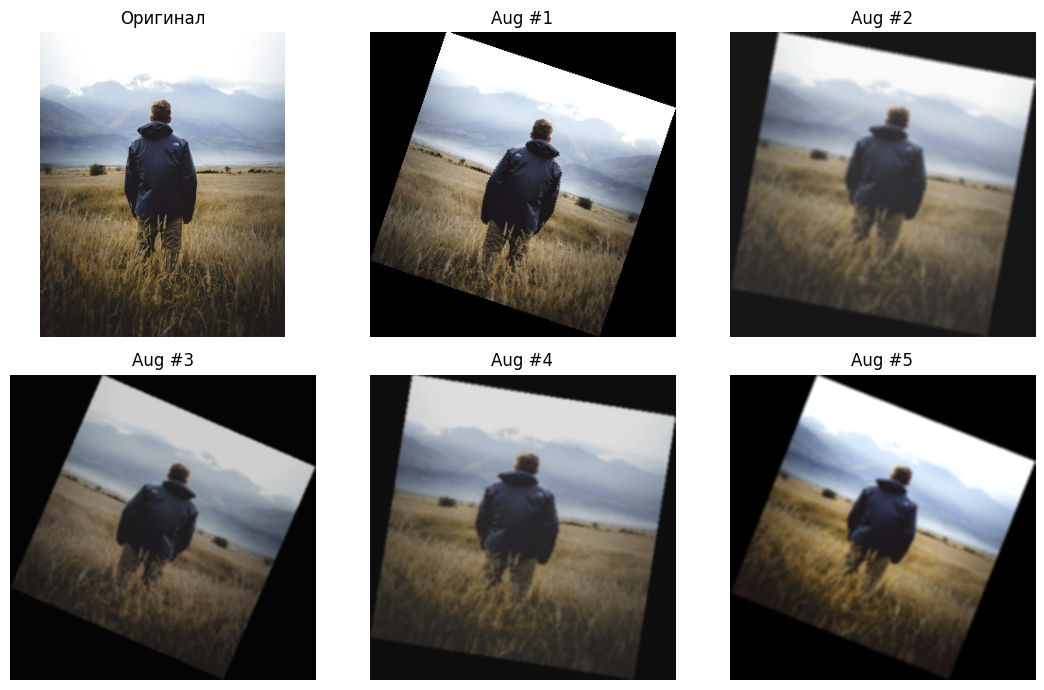

In [7]:
n = 5
fig, axes = plt.subplots(2, 3, figsize=(11, 7))
axes = axes.flatten()

axes[0].imshow(img); axes[0].set_title("Оригинал"); axes[0].axis("off")

for i in range(1, n+1):
    aug_img = augment(img)
    axes[i].imshow(aug_img); axes[i].set_title(f"Aug #{i}"); axes[i].axis("off")

for j in range(n+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout(); plt.show()

# Выводы:

1) RandomResizedCrop заставляет сеть учиться распознавать объект, даже если он занимает разную долю изображения или смещён в сторону.

2) Горизонтальное отражение хорошо для симметричных классов.

3) Повороты полезны, если ориентация объекта не фиксирована.

4) ColorJitter учит модель игнорировать изменения освещения, снижает переобучение на идеально подсвеченные сцены.

5) GaussianBlur повышает устойчивость к несовершенной фокусировке камер.


